In [1]:
import rdkit
from rdkit.Chem import AllChem as Chem
from rdkit.DataStructs import cDataStructs
import numpy as np
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
import os
import time
import pickle
from sklearn.preprocessing import StandardScaler
import random


from rdkit.Chem import QED

import csv, json

In [24]:
df = pickle.load(open(f"/u/macdougt/Research/2019-nCov/Data/final_df.pkl", "rb"))

In [25]:
df.insert(3, 'smiles', [Chem.MolToSmiles(x) for x in df[['Mol Object']].values[:,0]], True)

In [4]:
df.insert(4, 'qed', [QED.qed(x) for x in df[['Mol Object']].values[:,0]], True)

In [5]:
salt_indexes = []
for i in range(len(df)):
    if "." in df[["smiles"]].values[i][0]:
        salt_indexes.append(i)

In [6]:
df = df.reset_index()

In [7]:
df = df.drop(df.index[salt_indexes])

In [8]:
df[["smiles", "qed"]].to_csv("250k_rndm_zinc_drugs_clean_3.csv", index=False)

In [10]:
with open("/u/macdougt/PycharmProjects/constrained-graph-variational-autoencoder/data/valid_idx_zinc.json", 'r') as f:
    valid_idx = json.load(f)

In [11]:
len(valid_idx) #about 10% train/valid split

675

In [12]:
new_valid_idx = random.sample(range(6742), 674)
new_valid_idx.sort()
with open("valid_idx_zinc.json", 'w') as f:
    json.dump(new_valid_idx, f)

In [13]:
download_path = "250k_rndm_zinc_drugs_clean_3.csv"
with open(download_path, 'r') as f:
    all_data = list(csv.DictReader(f))
len(all_data)

6742

In [14]:
for i, data_item in enumerate(all_data):
    smiles = data_item['smiles'].strip()
    print(type(smiles))
    QED = float(data_item['qed'])
    print(type(QED))

<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'st

<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'fl

<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'fl

<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'st

<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'st

In [26]:
df.insert(2, 'log_std', [-np.log10(x) for x in df[['PubChem Standard Value']].values[:,0]], True)

(array([533., 621., 694., 795., 775., 812., 629., 398., 315., 294., 234.,
        179., 263., 158.,  50.,  19.,   1.,   0.,   1.,   1.,   2.,   1.,
          3.,   1.,   1.]),
 array([1.00256993, 1.27662201, 1.55067409, 1.82472617, 2.09877825,
        2.37283033, 2.64688242, 2.9209345 , 3.19498658, 3.46903866,
        3.74309074, 4.01714282, 4.2911949 , 4.56524699, 4.83929907,
        5.11335115, 5.38740323, 5.66145531, 5.93550739, 6.20955948,
        6.48361156, 6.75766364, 7.03171572, 7.3057678 , 7.57981988,
        7.85387196]),
 <a list of 25 Patch objects>)

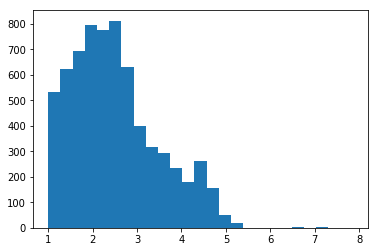

In [32]:
plt.hist(df[['log_std']].values[:,0], bins=25)

In [37]:
df2 = pd.read_csv("~/Research/graph-neural-networks-for-drug-discovery/toydata/piece-of-esol.csv", engine="python", delimiter="\t")

In [38]:
df2

COMMENT                                             SMILES  \
0        NaN  N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...   
1        NaN                             Cc1occc1C(=O)Nc1ccccc1   
2        NaN                                            c1ccsc1   
3        NaN                                      c1ccc2scnc2c1   
4        NaN                Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1   
..       ...                                                ...   
195      NaN                                         O=C1CCCCC1   
196      NaN                                       Cc1cccc(N)c1   
197      NaN                                     N#CC(Cl)(Cl)Cl   
198      NaN              CNc1cnn(-c2cccc(C(F)(F)F)c2)c(=O)c1Cl   
199      NaN                                     CCCCCCCCC(C)=O   

     measured log solubility in mols per litre  
0                                     1.088088  
1                                    -0.119254  
2                                     0.820851  
3                                     0.739725  
4                                    -2.037640  
..                                         ...  
195                                   1.169214  
196                                   1.049912  
197                                   0.420948  
198                                  -0.475253  
199                                  -0.119254  

[200 rows x 3 columns]

(array([ 2.,  2.,  1.,  4.,  2.,  2.,  4.,  9.,  7.,  7., 12., 13., 17.,
        11., 11., 15., 16., 15., 13., 14.,  7.,  6.,  5.,  4.,  1.]),
 array([-2.64846909, -2.45873024, -2.26899138, -2.07925252, -1.88951366,
        -1.69977481, -1.51003595, -1.32029709, -1.13055824, -0.94081938,
        -0.75108052, -0.56134167, -0.37160281, -0.18186395,  0.0078749 ,
         0.19761376,  0.38735262,  0.57709147,  0.76683033,  0.95656919,
         1.14630804,  1.3360469 ,  1.52578576,  1.71552461,  1.90526347,
         2.09500233]),
 <a list of 25 Patch objects>)

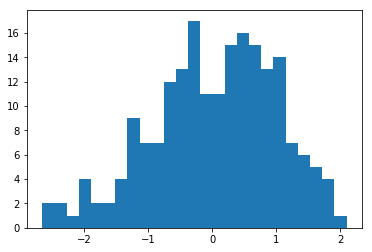

In [39]:
plt.hist(df2[['measured log solubility in mols per litre']].values[:,0], bins=25)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
scaler = StandardScaler()

In [45]:
scaler.fit(df[['log_std']].values[:,0].reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaler.transform(df[['log_std']].values[:,0].reshape(-1, 1))

array([[ 1.76984518],
       [-1.39223174],
       [-0.40911853],
       ...,
       [-1.22810679],
       [-1.46664122],
       [-1.13829474]])

(array([533., 621., 694., 795., 775., 812., 629., 398., 315., 294., 234.,
        179., 263., 158.,  50.,  19.,   1.,   0.,   1.,   1.,   2.,   1.,
          3.,   1.,   1.]),
 array([-1.54118301, -1.26191967, -0.98265634, -0.703393  , -0.42412967,
        -0.14486634,  0.134397  ,  0.41366033,  0.69292366,  0.972187  ,
         1.25145033,  1.53071366,  1.809977  ,  2.08924033,  2.36850366,
         2.647767  ,  2.92703033,  3.20629367,  3.485557  ,  3.76482033,
         4.04408367,  4.323347  ,  4.60261033,  4.88187367,  5.161137  ,
         5.44040033]),
 <a list of 25 Patch objects>)

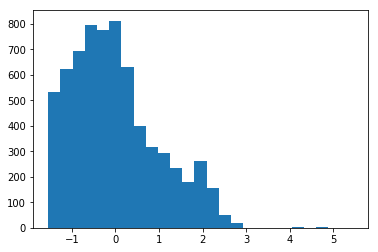

In [48]:
plt.hist(scaler.transform(df[['log_std']].values[:,0].reshape(-1, 1)), bins=25)

In [50]:
df.insert(2, 'log_std_scaled', scaler.transform(df[['log_std']].values[:,0].reshape(-1, 1)), True)

In [52]:
df

Mol Object  PubChem Standard Value  \
9   <rdkit.Chem.rdchem.Mol object at 0x7f270f1326c0>                0.000056   
7   <rdkit.Chem.rdchem.Mol object at 0x7f270f132730>                0.071000   
8   <rdkit.Chem.rdchem.Mol object at 0x7f270f132110>                0.007700   
9   <rdkit.Chem.rdchem.Mol object at 0x7f270f1322d0>                0.000006   
9   <rdkit.Chem.rdchem.Mol object at 0x7f270f132ab0>                0.009000   
..                                               ...                     ...   
13  <rdkit.Chem.rdchem.Mol object at 0x7f270e48d880>                0.011000   
8   <rdkit.Chem.rdchem.Mol object at 0x7f270e48d8f0>                0.070000   
7   <rdkit.Chem.rdchem.Mol object at 0x7f270e48d960>                0.049000   
9   <rdkit.Chem.rdchem.Mol object at 0x7f270e48d9d0>                0.084000   
10  <rdkit.Chem.rdchem.Mol object at 0x7f270e48da40>                0.040000   

    log_std_scaled   log_std Standard Type  \
9         1.769845  4.251812            Ki   
7        -1.392232  1.148742            Ki   
8        -0.409119  2.113509            Ki   
9         2.758328  5.221849            Ki   
9        -0.478159  2.045757            Ki   
..             ...       ...           ...   
13       -0.566966  1.958607          IC50   
8        -1.385954  1.154902          IC50   
7        -1.228107  1.309804          IC90   
9        -1.466641  1.075721          IC90   
10       -1.138295  1.397940          IC90   

                                               smiles  
9   C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2cc(-c...  
7   C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2cc(-c...  
8   C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2cc(-c...  
9   C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2cc(-c...  
9   C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2cc(-c...  
..                                                ...  
13  CCCNC(=O)[C@@H](NC(=O)Cc1ccccc1)[C@@H]1N[C@@H]...  
8   CC(C)CN1CC(O)(CNC(=O)[C@H]2N[C@@H]([C@H](NC(=O...  
7   O=C1N(Cc2ccc3cn[nH]c3c2)[C@H](Cc2ccccc2)[C@H](...  
9   Nc1nc2ccc(CN3C(=O)N(Cc4ccc5nc(N)oc5c4)[C@H](Cc...  
10  O=C1N(Cc2ccc3[nH]c(=O)oc3c2)[C@H](Cc2ccccc2)[C...  

[6780 rows x 6 columns]

In [84]:
data = df[["smiles", "log_std_scaled"]].values

In [85]:
np.random.shuffle(data)
train, valid, test = np.split(data, [int(.8*data.shape[0]), int(.9*data.shape[0])])

In [86]:
print(len(data))
print(len(train))
print(len(test))
print(len(valid))

6780
5424
678
678


In [87]:
#train = np.insert(train, 0, [None, None], 0)
train = np.insert(train, 0, [None]*train.shape[0], 1)

In [88]:
#valid = np.insert(valid, 0, [None, None], 0)
valid = np.insert(valid, 0, [None]*valid.shape[0], 1)

In [89]:
#test = np.insert(test, 0, [None, None], 0)
test = np.insert(test, 0, [None]*test.shape[0], 1)

In [90]:
pd.DataFrame(train).to_csv("~/Research/graph-neural-networks-for-drug-discovery/toydata/protease_train.csv.gz", index=False, compression='gzip', sep='\t')
pd.DataFrame(valid).to_csv("~/Research/graph-neural-networks-for-drug-discovery/toydata/protease_valid.csv.gz", index=False, compression='gzip', sep='\t')
pd.DataFrame(test).to_csv("~/Research/graph-neural-networks-for-drug-discovery/toydata/protease_test.csv.gz", index=False, compression='gzip', sep='\t')

array([[None,
        'CC(C)(C)OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CNC[C@@H](O)[C@H](Cc1ccc(OCC(=O)N2CCCCC2)cc1)NC(=O)OC(C)(C)C',
        -1.4971742058428288],
       [None,
        'CC(C)(C)NC(=O)c1ccccc1C[C@@H](O)[C@H](CSc1ccc2ccccc2c1)NC(=O)c1cccc(N)c1Cl',
        -0.7327876839180177],
       [None,
        'CNC(=O)c1c(-c2ccc(F)cc2)oc2cc(N(C)S(C)(=O)=O)c(-c3nc4c(cc3C)OCn3c-4cc4c(F)cccc43)cc12',
        -0.8088405017866744],
       ...,
       [None,
        'C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2nccc3cc(OC)ccc23)CN1C(=O)[C@@H](NC(=O)OC(C)(C)C)C(C)(C)C)C(=O)NS(=O)(=O)C1CC1',
        0.1874750591594522],
       [None,
        'CC(C)[C@H](NC(=O)N(C)Cc1cscn1)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)[C@@H](O)[C@H](Cc1ccccc1)NC(=O)[C@H](NC(=O)N(C)Cc1cscn1)C(C)C',
        0.4942293068519423],
       [None,
        'O=C1N(Cc2cccc(-c3ccn[nH]3)c2)[C@H](Cc2ccc(OCCO)cc2)[C@H](O)[C@@H](O)[C@@H](Cc2ccc(OCCO)cc2)N1Cc1cccc(-c2ccn[nH]2)c1',
        1.746750224708654]], dtype=object)